<h1> <b> Purpose of this analysis</b></h1>
Purpose of this mini project is to experiment some of data wrangling techniques. We have rcieved Lending Club Loan Data set from 2007 to 2015. There are total 2.2 million rows and 145 columns. It is important to do some pre-processing work in order to analyze data and fill out missing values.  

<h1> <b> Packages</b></h1>
We will start by importing some of packages. Following packages will be imported.


In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

sns.set_style('whitegrid')

Now we will be reading data from "Loan.csv" to Pandas Dataframe.

In [114]:
file1 = "Loan_cleandata.csv"
file2 = 'train_data.csv'
ChunkSize = 100000
i = 1
for chunk in pd.read_csv(file1, chunksize=ChunkSize):
    loan_data = chunk if i == 1 else pd.concat([loan_data, chunk])
    print('-->Read Chunk...', i)
    i += 1

# data_list = []
# for chunk in pd.read_csv(file2, low_memory=False, chunksize=100000):
#     data_list.append(chunk)
# train_data = pd.concat(data_list)
# del data_list

# create train and test dataset. All laons that are current will be test dataset.

loan_data.drop(loan_data.columns[0], axis=1, inplace = True)

-->Read Chunk... 1
-->Read Chunk... 2
-->Read Chunk... 3
-->Read Chunk... 4
-->Read Chunk... 5
-->Read Chunk... 6
-->Read Chunk... 7
-->Read Chunk... 8
-->Read Chunk... 9
-->Read Chunk... 10
-->Read Chunk... 11
-->Read Chunk... 12
-->Read Chunk... 13
-->Read Chunk... 14
-->Read Chunk... 15
-->Read Chunk... 16
-->Read Chunk... 17
-->Read Chunk... 18
-->Read Chunk... 19


Let's quickly check the shape of data.This will give us idea as how large is current dataset. As we can see, current data set contains more than 2 million rows and 145 columns. Not all columns are useful for our analysis. 

In [115]:
# print(list(data.columns))
print(loan_data.head())

   loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0       2500         2500           2500.0   36 months     13.56        84.92   
1      30000        30000          30000.0   60 months     18.94       777.23   
2       5000         5000           5000.0   36 months     17.97       180.69   
3       4000         4000           4000.0   36 months     18.94       146.51   
4      30000        30000          30000.0   60 months     16.14       731.78   

  grade sub_grade       emp_title  emp_length home_ownership  annual_inc  \
0     C        C1            Chef          10           RENT     55000.0   
1     D        D2     Postmaster           10       MORTGAGE     90000.0   
2     D        D1  Administrative           6       MORTGAGE     59280.0   
3     D        D2   IT Supervisor          10       MORTGAGE     92000.0   
4     C        C4        Mechanic          10       MORTGAGE     57250.0   

  verification_status   issue_d loan_status pymnt_plan  

In [116]:

# train_data.drop(train_data.columns[0], axis=1, inplace = True)
# print(loan_data.columns)

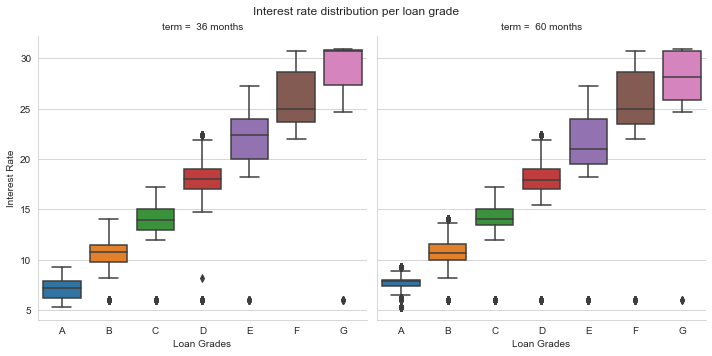

In [105]:
g =sns.catplot(x='grade', y = 'int_rate', data = loan_data, kind='box', order = sorted(loan_data['grade'].unique()),\
               col='term')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Interest rate distribution per loan grade', fontsize=12)
axes = g.axes.flatten()
axes[0].set_ylabel("Interest Rate")
for ax in axes:
    ax.set_xlabel("Loan Grades")
plt.subplots_adjust(hspace = 1.0,top = 0.9)              

In [117]:
loan_data['year'] = pd.to_datetime(loan_data['issue_d']).dt.year
# print(train_data['loan_status'].value_counts())
# train_data['status_var'] = train_data['loan_status'].map({'Fully Paid':0, 'Charged Off':1, 'Late (31-120 days)':1, \
#                                                         'In Grace Period':1, 'Late (16-30 days)':1, 'Default':1})
# print(train_data['status_var'].value_counts())
loan_status_dict = {"Fully Paid": 0, "Charged Off": 1, "Late (31-120 days)": 1,
                    "In Grace Period": 1, "Late (16-30 days)": 1, "Default": 1, "Current" : 2}
known_status = loan_data['loan_status'] != 'Current'
loan_data["loan_status_count"] = loan_data["loan_status"].map(loan_status_dict)
loan_data["loan_status_count"] = loan_data["loan_status_count"].astype("int")

loan_known_data = loan_data[known_status].reset_index()
loan_status_count = loan_known_data["loan_status_count"].value_counts().to_dict()
if 1 not in loan_status_count.keys():
    loan_status_count["1"] = 0.0
count_sum = 0
for key, value in loan_status_count.items():
    count_sum += value
for key, value in loan_status_count.items():
    value = value / count_sum
    loan_status_count[key] = value
loan_status_count_pd = pd.DataFrame(list(loan_status_count.items()), columns=["loan status", "count_percent"])
# print(loan_known_data.head())

Text(0, 0.5, 'Loans percent')

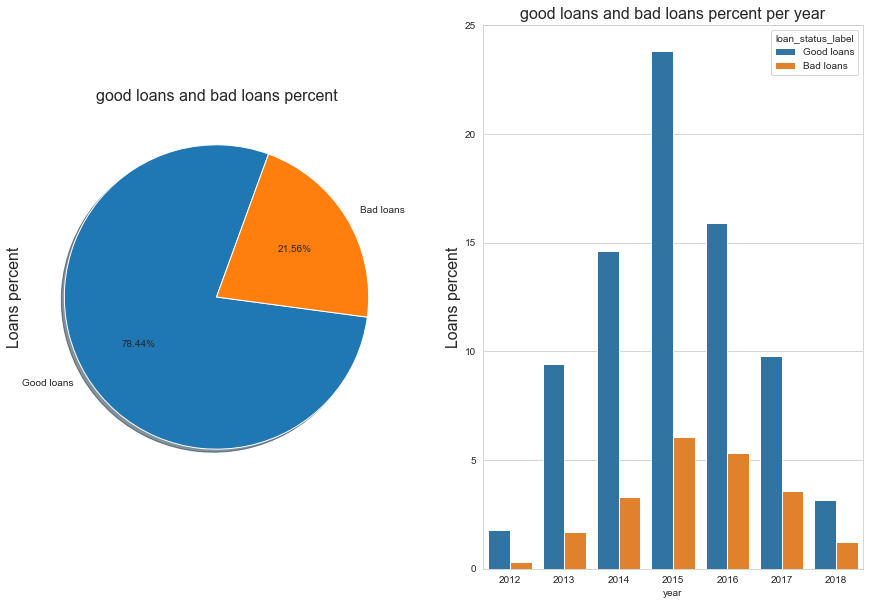

In [118]:
f_loan_status, ax_loan_status = plt.subplots(1, 2, figsize=(15, 10))
labels = "Good loans", "Bad loans"
ax_loan_status[0].pie(loan_status_count_pd["count_percent"], autopct="%1.2f%%", shadow=True,
                      labels=labels, startangle=70)
loan_status_dict = {0.0: "Good loans", 1.0: "Bad loans"}
loan_known_data["loan_status_label"] = loan_known_data["loan_status_count"].map(loan_status_dict)
sns.barplot(x=loan_known_data["year"], y=loan_known_data["loan_amnt"], hue=loan_known_data["loan_status_label"], hue_order=labels,
            ax=ax_loan_status[1], estimator=lambda x: len(x) / len(loan_known_data["loan_status_count"]) * 100)
ax_loan_status[0].set_title("good loans and bad loans percent", fontsize=16)
ax_loan_status[0].set_ylabel("Loans percent", fontsize=16)
ax_loan_status[1].set_title("good loans and bad loans percent per year", fontsize=16)
ax_loan_status[1].set_ylabel("Loans percent", fontsize=16)

In [119]:
# # loan_status_dict = {"Good loans" : 0 , "Bad loans" : 1}
# # loan_known_data["loan_status_count"] = loan_known_data["loan_status_count"].map(loan_status_dict)
# print(loan_known_data['loan_status_count'].head())
# print(loan_known_data[loan_known_data['loan_status_count']==1]['loan_status_count'].head())
# print(np.array(loan_known_data.groupby(['grade'])['loan_status_count'].count()))
# print(np.array(loan_known_data[loan_known_data['loan_status_count']==1].groupby(['grade'])['loan_status_count'].count()))
# # loan _pct = (np.array(loan_known_data[loan_known_data['loan_status_count']==1].groupby(['grade'])['loan_status_count'].count()))/(np.array(loan_known_data.groupby(['grade'])['loan_status_count'].count()))
# # print(loan_pct)
# # sns.barplot( x = 'grade', y = 'loan_status_count', data = loan_known_data[loan_known_data['loan_status_count']==1], order=sorted(loan_known_data['grade'].unique()), \
# #            estimator=lambda x: float(len(x)) / len(loan_known_data[loan_known_data['loan_status_count']==1]) * 100)

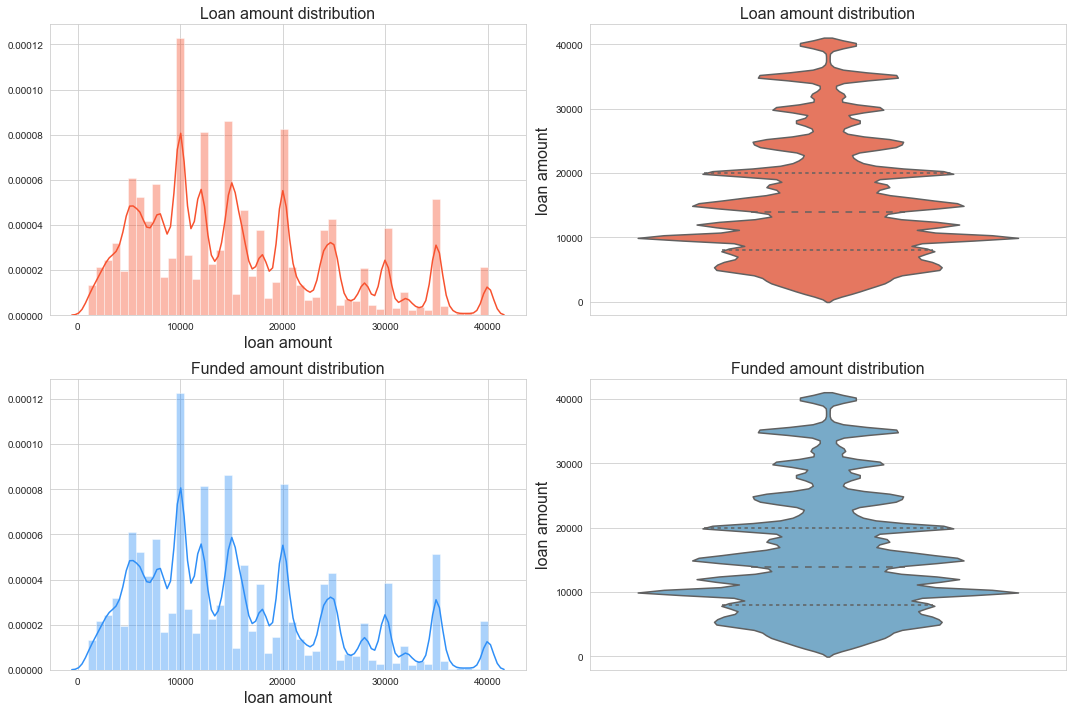

In [120]:
f_loan, ax_loan = plt.subplots(2, 2, figsize=(15, 10))
sns.distplot(loan_data["loan_amnt"], ax=ax_loan[0, 0], color="#F7522F")
sns.violinplot(y=loan_data["loan_amnt"], ax=ax_loan[0, 1], inner="quartile", palette="Reds")
sns.distplot(loan_data["funded_amnt"], ax=ax_loan[1, 0], color="#2F8FF7")
sns.violinplot(y=loan_data["funded_amnt"], ax=ax_loan[1, 1], inner="quartile", palette="Blues")
ax_loan[0, 0].set_title("Loan amount distribution", fontsize=16)
ax_loan[0, 1].set_title("Loan amount distribution", fontsize=16)
ax_loan[1, 0].set_title("Funded amount distribution", fontsize=16)
ax_loan[1, 1].set_title("Funded amount distribution", fontsize=16)
ax_loan[0, 0].set_xlabel("loan amount", fontsize=16)
ax_loan[1, 0].set_xlabel("loan amount", fontsize=16)
ax_loan[0, 1].set_ylabel("loan amount", fontsize=16)
ax_loan[1, 1].set_ylabel("loan amount", fontsize=16)
plt.tight_layout()

Text(0, 0.5, 'Density')

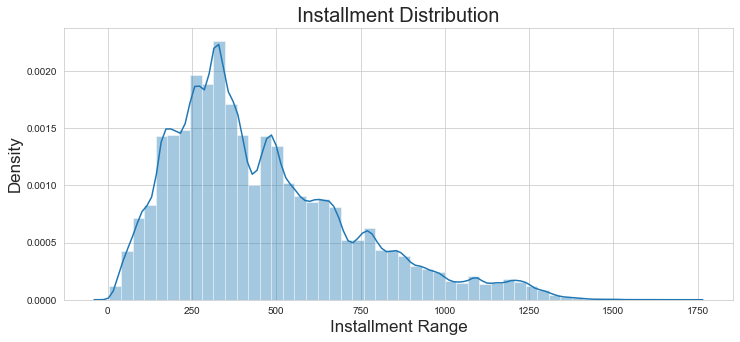

In [92]:
plt.figure(figsize=(12,5))

sns.distplot(loan_data['installment'])
plt.title("Installment Distribution", fontsize=20)
plt.xlabel("Installment Range", fontsize=17)
plt.ylabel("Density", fontsize=17)


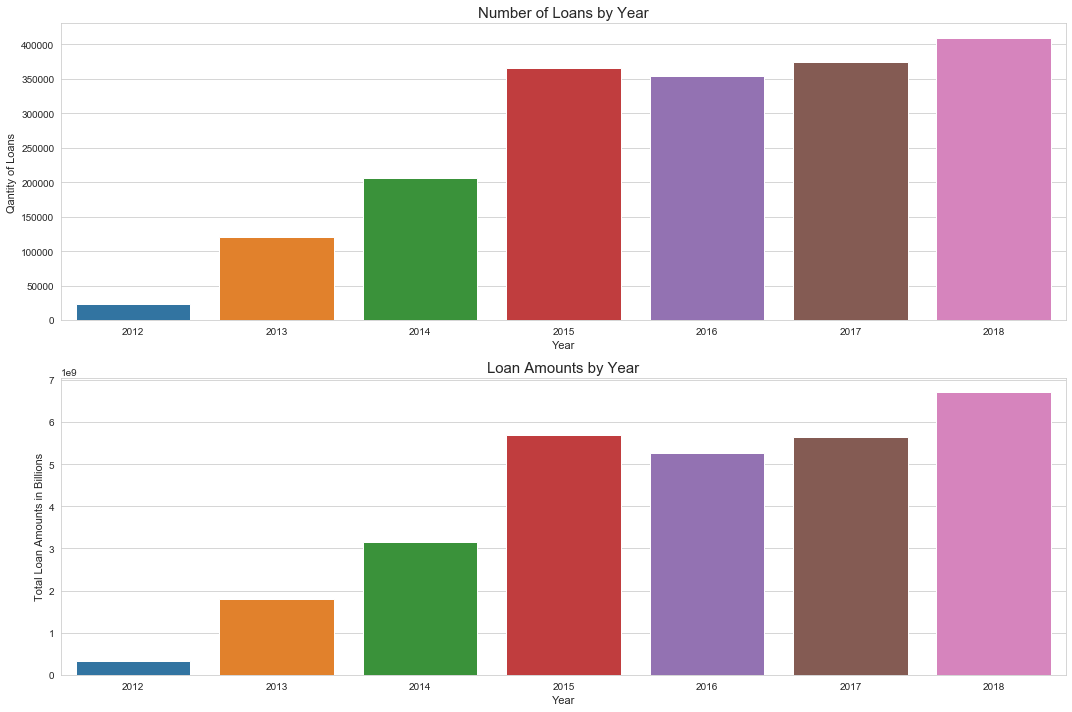

In [125]:

loan_year_num = loan_data['year'].value_counts().to_dict()
loan_year_num_pd = pd.DataFrame(list(loan_year_num.items()), columns=["year", "loan times"])
loan_year_num_pd.sort_values("year", inplace=True)
# print(loan_year_num_pd)
loan_money_count_per_year = loan_data.groupby("year")["loan_amnt"].sum().to_dict()
loan_money_count_per_year_pd = pd.DataFrame(list(loan_money_count_per_year.items()), columns=["year", "loan_amnt"])
loan_money_count_per_year_pd.sort_values("year", inplace=True)
# print(loan_money_count_per_year_pd)

fig, ax= plt.subplots(2, 1, figsize=(15, 10))
sns.barplot(x='year', y = 'loan times', data = loan_year_num_pd, palette = 'tab10', ax=ax[0])
sns.barplot(x='year', y = 'loan_amnt', data = loan_money_count_per_year_pd, palette = 'tab10', ax=ax[1] )

ax[0].set_title('Number of Loans by Year', fontsize = 15)
ax[1].set_title('Loan Amounts by Year', fontsize = 15)

ax[0].set_ylabel('Qantity of Loans', fontsize=11)
ax[0].set_xlabel('Year', fontsize=11)
ax[1].set_ylabel('Total Loan Amounts in Billions', fontsize=11)
ax[1].set_xlabel('Year', fontsize=11)


plt.tight_layout()


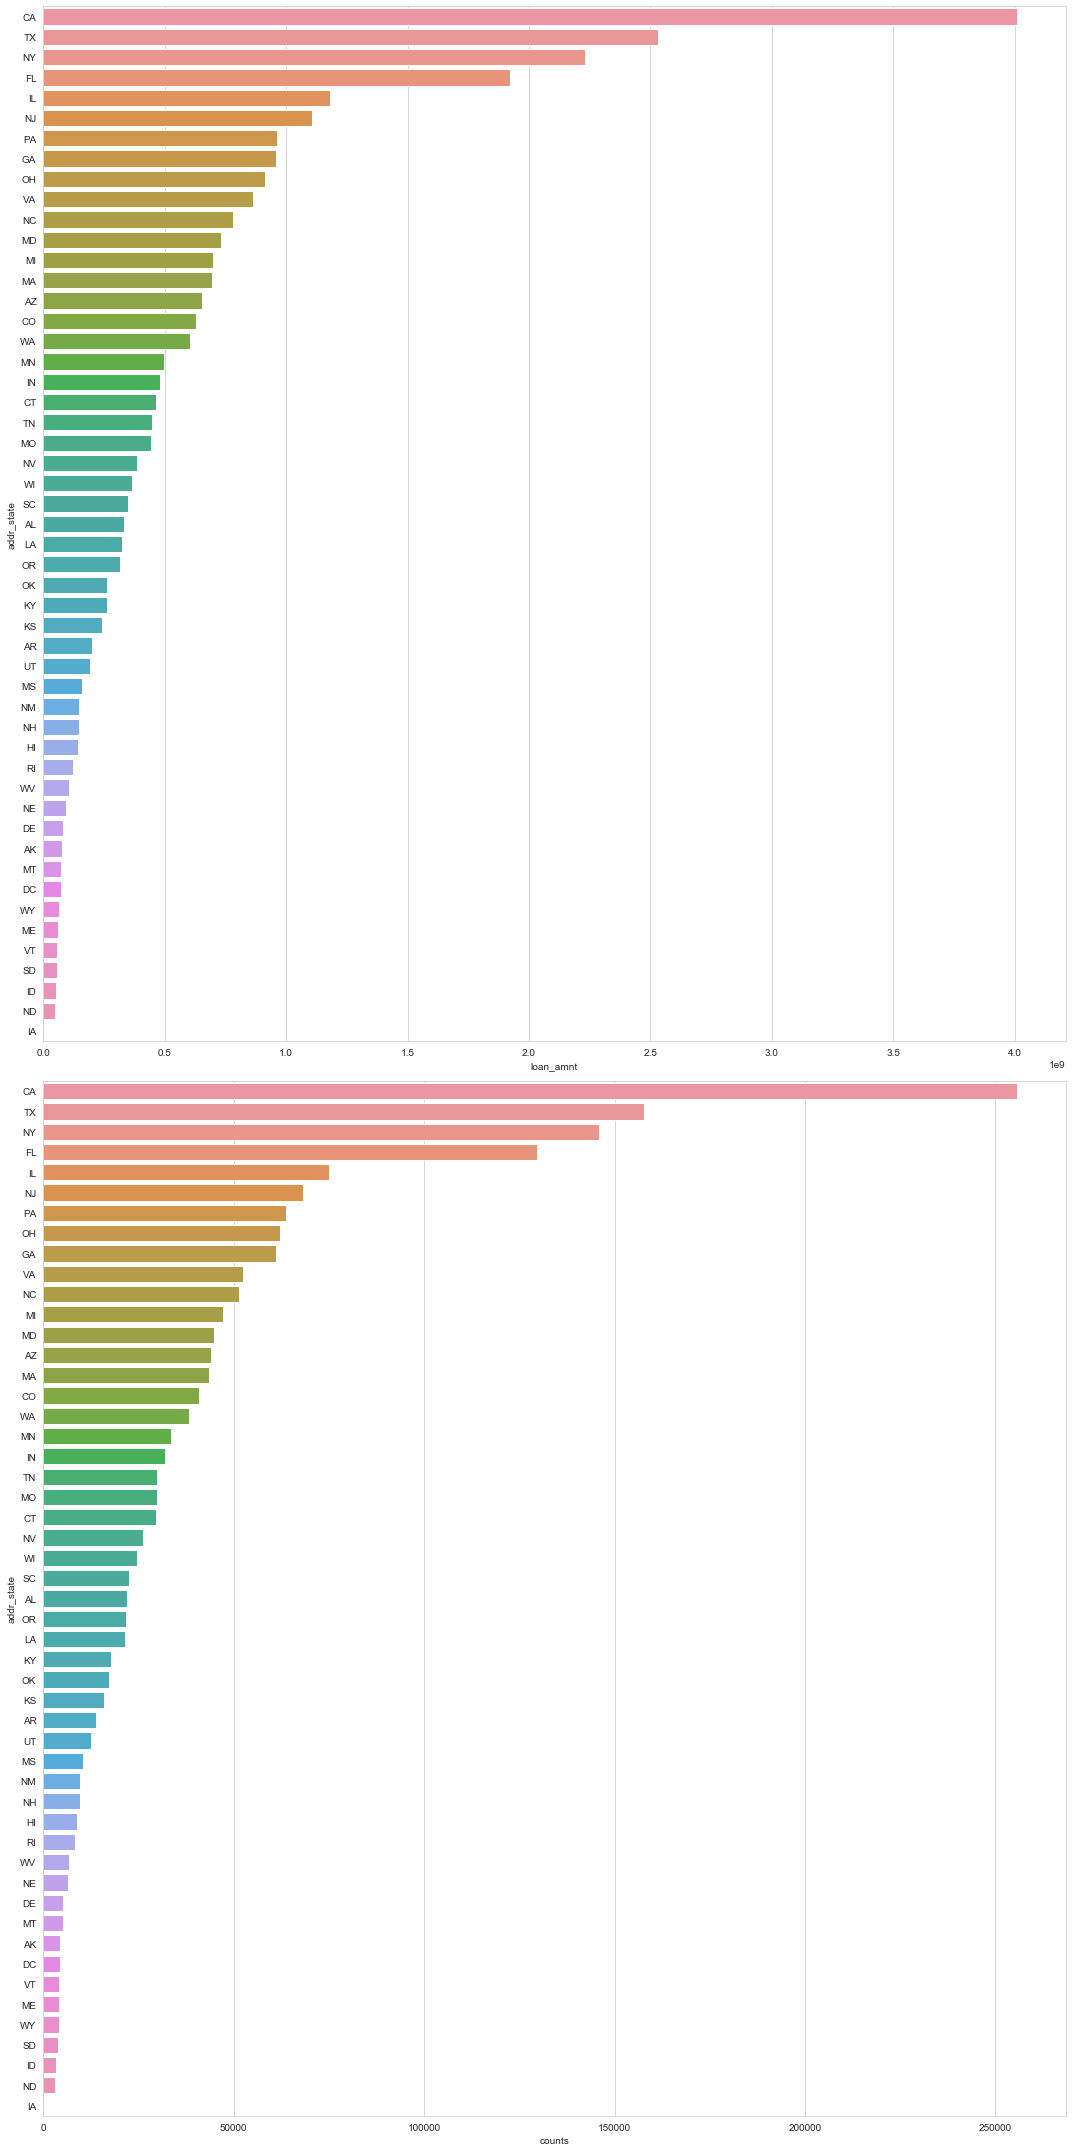

In [126]:

loan_amnt_per_state = loan_data[['addr_state', 'loan_amnt']].groupby('addr_state').sum().sort_values(by='loan_amnt', ascending=False).reset_index()
# print(loan_amnt_per_state)
loan_per_state = loan_data['addr_state'].value_counts().rename_axis('addr_state').reset_index(name='counts')
# print(loan_per_state)
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(15,30))
sns.barplot(x='loan_amnt', y = 'addr_state', data = loan_amnt_per_state, orient = 'h', ax=ax1 )
sns.barplot(x='counts', y = 'addr_state', data = loan_per_state, orient = 'h', ax=ax2 )

ax[0].set_title('Loan Amounts in Billions by State', fontsize = 15)
ax[1].set_title('Total number of Loans by state', fontsize = 15)

ax[1].set_xlabel('Qantity of Loans', fontsize=11)
ax[1].set_ylabel('State', fontsize=11)
ax[0].set_xlabel('Total Loan Amounts in Billions', fontsize=11)
ax[0].set_ylabel('State', fontsize=11)


plt.tight_layout()

In [127]:
# loan_amnt_per_job = loan_data[['emp_title', 'loan_amnt']].groupby('emp_title').mean().\
# sort_values(by = 'loan_amnt', ascending = False).reset_index()
# print(loan_amnt_per_job)

# loan_per_job = loan_data['emp_title'].value_counts().rename_axis('emp_title').reset_index(name = 'counts')
# fig, ax = plt.subplots(figsize=(15,30))
# sns.barplot(x='loan_amnt', y = 'emp_title', data = loan_amnt_per_job, orient = 'h', ax=ax )
# sns.barplot(x='counts', y = 'emp_title', data = loan_per_job, orient = 'h', ax=ax2 )


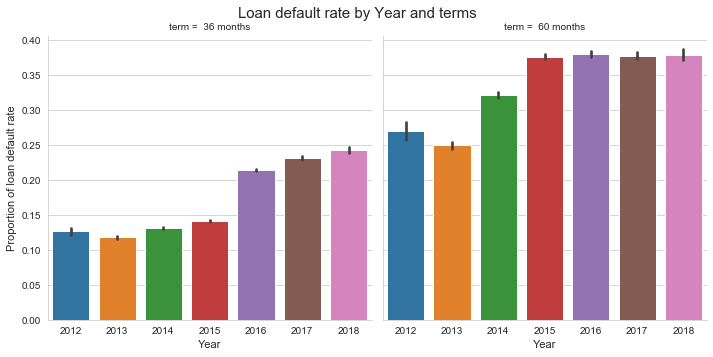

In [130]:
# fig, (ax1, ax2) = plt.subplots(1,2,figsize=(30,15))
# loan_known_data['year'] = pd.to_datetime(loan_known_data['issue_d']).dt.year
g = sns.catplot(x = 'year', y= 'loan_status_count', data=loan_known_data, kind='bar', col = 'term', sharey=True)
plt.tight_layout()

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Loan default rate by Year and terms', fontsize=15)
axes = g.axes.flatten()
axes[0].set_ylabel("Proportion of loan default rate", fontsize=11)
for ax in axes:
    ax.set_xlabel("Year", fontsize=11)

In [131]:
# loan_known_data[['status_var']].apply(pd.value_counts).plot.pie(subplots=True)

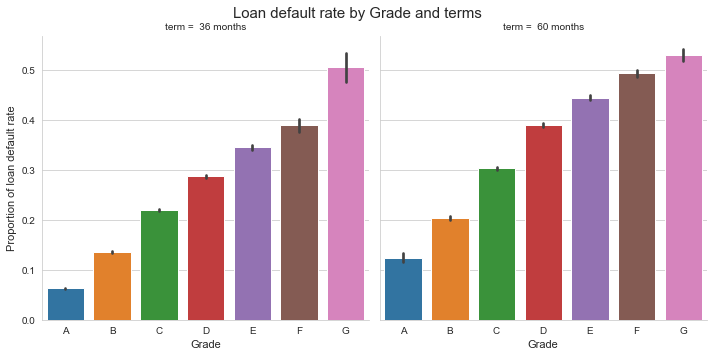

In [132]:
g = sns.catplot(x = 'grade', y= 'loan_status_count', data=loan_known_data, kind='bar', \
            order = sorted(loan_known_data['grade'].unique()), col='term')
plt.tight_layout()

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Loan default rate by Grade and terms', fontsize=15)
axes = g.axes.flatten()
axes[0].set_ylabel("Proportion of loan default rate", fontsize=11)
for ax in axes:
    ax.set_xlabel("Grade", fontsize=11)


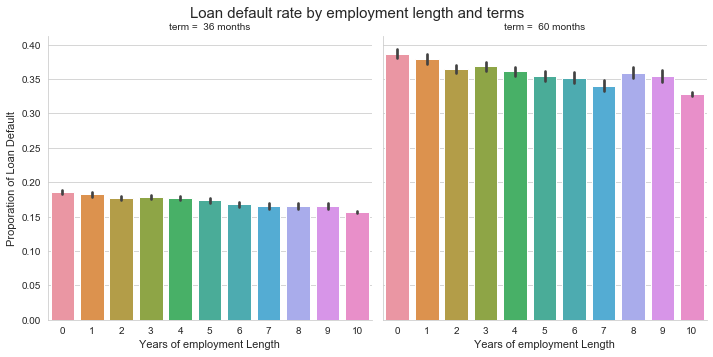

In [133]:
g = sns.catplot(x = 'emp_length', y= 'loan_status_count', data=loan_known_data, kind='bar', col='term')

plt.tight_layout()

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Loan default rate by employment length and terms', fontsize=15)
axes = g.axes.flatten()
axes[0].set_ylabel("Proporation of Loan Default", fontsize=11)
for ax in axes:
    ax.set_xlabel("Years of employment Length", fontsize=11)

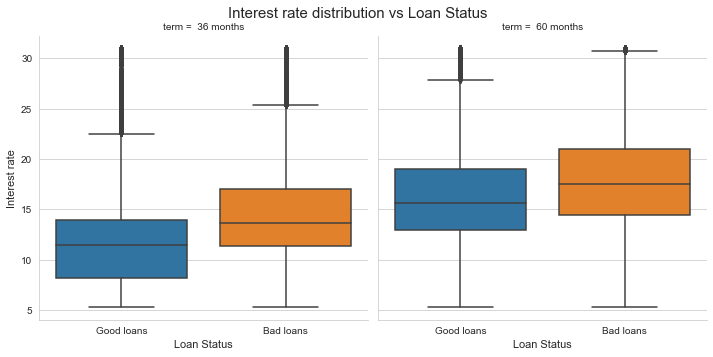

In [134]:
g = sns.catplot(x='loan_status_label', y = 'int_rate', data=loan_known_data, kind='box', col='term', order=labels)
plt.tight_layout()

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Interest rate distribution vs Loan Status', fontsize=15)
axes = g.axes.flatten()
axes[0].set_ylabel("Interest rate", fontsize=11)
for ax in axes:
    ax.set_xlabel("Loan Status", fontsize=11)

In [135]:
loan_grade = ['loan_status_label', 'grade']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(loan_known_data[loan_grade[0]], loan_known_data[loan_grade[1]]).style.background_gradient(cmap = cm)

grade,A,B,C,D,E,F,G
loan_status_label,,,,,,,
Bad loans,12252,45249,76074,52894,31147,12378,4052
Good loans,176387,269211,235119,108381,44993,13829,3646


In [136]:
loan_home = ['loan_status_label', 'home_ownership']
cm = sns.light_palette("green", as_cmap=True)
round(pd.crosstab(loan_known_data[loan_home[0]], loan_known_data[loan_home[1]], 
            normalize='index'),2).fillna(0).style.background_gradient(cmap = cm)

home_ownership,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
loan_status_label,,,,,,
Bad loans,0,0.44,0,0,0.11,0.46
Good loans,0,0.52,0,0,0.1,0.38


In [137]:
purp_loan= ['purpose', 'loan_status_label']
cm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(loan_known_data[purp_loan[0]], loan_known_data[purp_loan[1]], 
                   normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

loan_status_label,Bad loans,Good loans
purpose,,
car,0.75,1.02
credit_card,18.54,23
debt_consolidation,61.88,58.18
educational,0,0
home_improvement,5.84,6.54
house,0.6,0.5
major_purchase,2.07,2.06
medical,1.23,1.08
moving,0.81,0.64


In [138]:
loan_grade = ['loan_status_label', 'grade']
cm = sns.light_palette("green", as_cmap=True)
round(pd.crosstab(loan_known_data[loan_grade[0]], loan_known_data[loan_grade[1]], 
            values=loan_known_data['int_rate'], aggfunc='mean'),2).fillna(0).style.background_gradient(cmap = cm)

grade,A,B,C,D,E,F,G
loan_status_label,,,,,,,
Bad loans,7.36,10.76,14.11,17.9,21.36,25.34,28.26
Good loans,7.08,10.63,14.01,17.73,21.22,25.07,27.86


In [139]:
loan_verification = ['loan_status_label', 'verification_status']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(loan_known_data[loan_verification[0]], loan_known_data[loan_verification[1]], 
            normalize='index').style.background_gradient(cmap = cm)

verification_status,Not Verified,Source Verified,Verified
loan_status_label,,,
Bad loans,0.223657,0.446831,0.329512
Good loans,0.322892,0.40806,0.269048


In [140]:
title_mask = loan_known_data.emp_title.value_counts()[:20].index.values 
cm = sns.light_palette("green", as_cmap=True)

round(pd.crosstab(loan_known_data[loan_known_data['emp_title'].isin(title_mask)]['emp_title'], 
                  loan_known_data[loan_known_data['emp_title'].isin(title_mask)]['grade'], 
                  normalize='index') * 100,2).style.background_gradient(cmap = cm)

grade,A,B,C,D,E,F,G
emp_title,,,,,,,
Director,25.17,29.15,26.14,11.83,5.52,1.7,0.48
Driver,12.76,27.82,29.92,18.16,7.91,2.45,0.98
Engineer,24.87,28.27,26.53,11.99,5.43,2.24,0.66
General Manager,17.72,29.8,28.91,13.97,6.74,2.13,0.72
Manager,17.33,28,29.48,14.78,7.19,2.33,0.89
Office Manager,16.59,28.85,29.53,14.73,7.28,2.45,0.58
Operations Manager,16.96,28.5,29.25,15.05,7.24,2.29,0.72
Owner,20.74,29.71,26.95,13.9,6.02,2,0.68
President,28.08,28.53,25.06,11.57,4.76,1.43,0.57


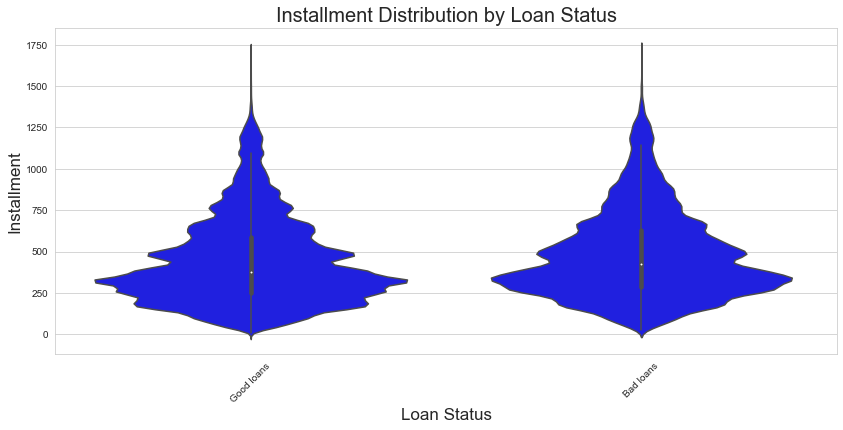

In [141]:
plt.figure(figsize = (14,6))

# plt.subplot(211)
g = sns.violinplot(x='loan_status_label', y="installment",
                   data=loan_known_data, color='blue')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Loan Status", fontsize=17)
g.set_ylabel("Installment", fontsize=17)
g.set_title("Installment Distribution by Loan Status", fontsize=20)

# plt.subplot(212)
# g1 = sns.violinplot(x='loan_status', y="total_acc",
#                    data=df_loan, color='blue')
# g1.set_xticklabels(g.get_xticklabels(),rotation=45)
# g1.set_xlabel("Loan Status", fontsize=17)
# g1.set_ylabel("Total Account lines", fontsize=17)
# g1.set_title("Total Account Lines Distribution by Loan Status", fontsize=20)

# plt.subplots_adjust(hspace = 0.5,top = 0.9)

plt.show()

I m constantly improving this file and stay tuned for more EDA.!!!